# SafeML Implementation for German Traffic Sign Recognition
In this example, we try to show how SafeML approach can be used for German Traffic Sign Recognition.We have used an existing code from the following URL that do the traffic sign classification using Convolutional Neural Networks (CNNs) with about 97% accuracy. Then the SafeML part is added to show how the safety of the approach can be monitored:

Source: https://www.kaggle.com/lalithmovva/99-accuracy-on-german-traffic-sign-recognition

Here is the table of content:
* Defining the required libraries and loading the german traffic sgin recognition dataset.
* Separating Train, Test and Validation Data
* Defining the CNN model and its architecture.
* Training the model and calculating its accuracy
* Applying the model on test data
* Comparing the true labels with predicted labels and using the statistical parametric mapping (as the SafeML method)

## Defining the required libraries and loading the german traffic sgin recognition dataset.
Before running the code, the dataset should be downloaded an stored on the local computer. Please make sure that the path has been chosen correctly. 

In [1]:
#Source: https://www.kaggle.com/lalithmovva/99-accuracy-on-german-traffic-sign-recognition
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "../input/gtsrb-german-traffic-sign/Train/{0}/".format(i)
    #path = "C:/cmder/Python_Tests/GTSRB/Train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

../input/gtsrb-german-traffic-sign/Train/0/
../input/gtsrb-german-traffic-sign/Train/1/
../input/gtsrb-german-traffic-sign/Train/2/
../input/gtsrb-german-traffic-sign/Train/3/
../input/gtsrb-german-traffic-sign/Train/4/
../input/gtsrb-german-traffic-sign/Train/5/
../input/gtsrb-german-traffic-sign/Train/6/
../input/gtsrb-german-traffic-sign/Train/7/
../input/gtsrb-german-traffic-sign/Train/8/
../input/gtsrb-german-traffic-sign/Train/9/
../input/gtsrb-german-traffic-sign/Train/10/
../input/gtsrb-german-traffic-sign/Train/11/
../input/gtsrb-german-traffic-sign/Train/12/
../input/gtsrb-german-traffic-sign/Train/13/
../input/gtsrb-german-traffic-sign/Train/14/
../input/gtsrb-german-traffic-sign/Train/15/
../input/gtsrb-german-traffic-sign/Train/16/
../input/gtsrb-german-traffic-sign/Train/17/
../input/gtsrb-german-traffic-sign/Train/18/
../input/gtsrb-german-traffic-sign/Train/19/
../input/gtsrb-german-traffic-sign/Train/20/
../input/gtsrb-german-traffic-sign/Train/21/
../input/gtsrb-germa

## Separating Train, Test and Validation Data
In this section, 20% of data is separated for test and validation and the rest is used for training. This section can be improved using methods like K-fold cross-validation. We tried to make it as simple as possible.

In [2]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

## Defining the CNN model and its architecture
Here the CNN model's structure is defined. Regarding the loss function the categorical crossentropy is used, and the ADAM is selection for the network optimization.

In [3]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

## Training the Model and calculating its accuracy
In this section, the CNN model is trained and the accuracy plot is shown. 

Epoch 1/20
981/981 [==============================] - 56s 57ms/step - loss: 1.1690 - accuracy: 0.6698 - val_loss: 0.1194 - val_accuracy: 0.9682
Epoch 2/20
981/981 [==============================] - 56s 57ms/step - loss: 0.2269 - accuracy: 0.9308 - val_loss: 0.0663 - val_accuracy: 0.9860
Epoch 3/20
981/981 [==============================] - 56s 58ms/step - loss: 0.1414 - accuracy: 0.9565 - val_loss: 0.0354 - val_accuracy: 0.9931
Epoch 4/20
981/981 [==============================] - 57s 58ms/step - loss: 0.1117 - accuracy: 0.9665 - val_loss: 0.0266 - val_accuracy: 0.9941
Epoch 5/20
981/981 [==============================] - 56s 57ms/step - loss: 0.0833 - accuracy: 0.9749 - val_loss: 0.0303 - val_accuracy: 0.9936
Epoch 6/20
981/981 [==============================] - 57s 58ms/step - loss: 0.0787 - accuracy: 0.9755 - val_loss: 0.0220 - val_accuracy: 0.9948
Epoch 7/20
981/981 [==============================] - 57s 58ms/step - loss: 0.0708 - accuracy: 0.9784 - val_loss: 0.0206 - val_accuracy:

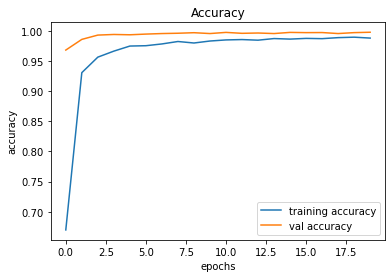

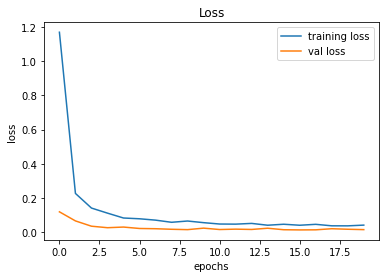

In [4]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## Applying the model on test data
Having trained the CNN model, the test data is used. The predicted decisions has been stored as "y_pred". As can be seen the accuracy of the model is about 0.97%.

In [5]:
#Predicting with the test data
y_test=pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
# labels=y_test['Path'].as_matrix()
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../input/gtsrb-german-traffic-sign/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
y_pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score

print(y_pred)

accuracy_score(y_test, y_pred)

[16  1 38 ...  5  7 10]


0.9752969121140143

## Comparing the true labels with predicted labels and using the statistical parametric mapping (as the SafeML method)
<p style='text-align: justify;'> 
The idea of SafeML is to measure statistical distances and estimate the accuracy of the model when there is no available labels. Having an accuracy estimation at run time can be so vital for safety-critical applications. In this section, the statistical difference is addressed and the accuracy estimation will be considered on our later versions. Here, we simply find the test data where y_test is not equal to the predicted one (y_pred) and name it as X_test_wrong, y_test_wrong. Then for example, for label == 2, we compare the trained data (trusted data) and the X_test_wrong (selecting only label 2 ones for instance). Then using statistical parametric mapping, we try to find the statistical explanation to see what was different that our CNN model made a wronge decision. This explanation can be investigated in different perspectives and we just provide a sample.</p>

To find more about SafeML idea, please check our GitHub:

https://github.com/ISorokos/SafeML

     |████████████████████████████████| 8.5 MB 5.1 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
1.1710172121804567
0.8670740126490033
0.6612112165302406


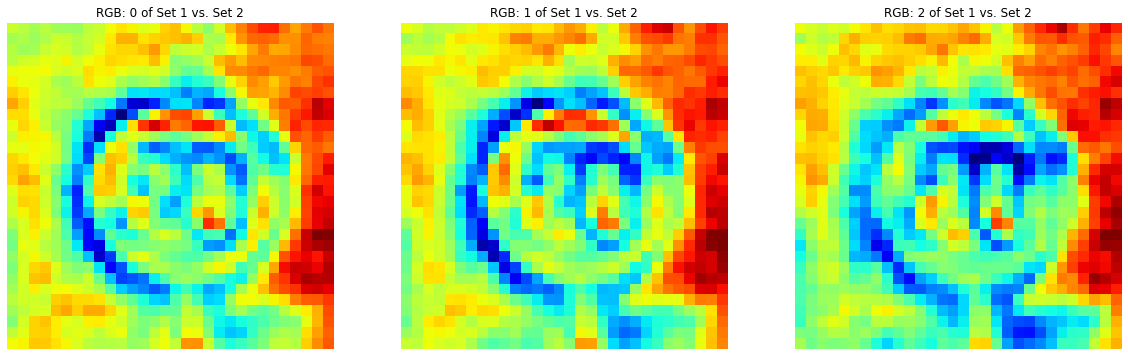

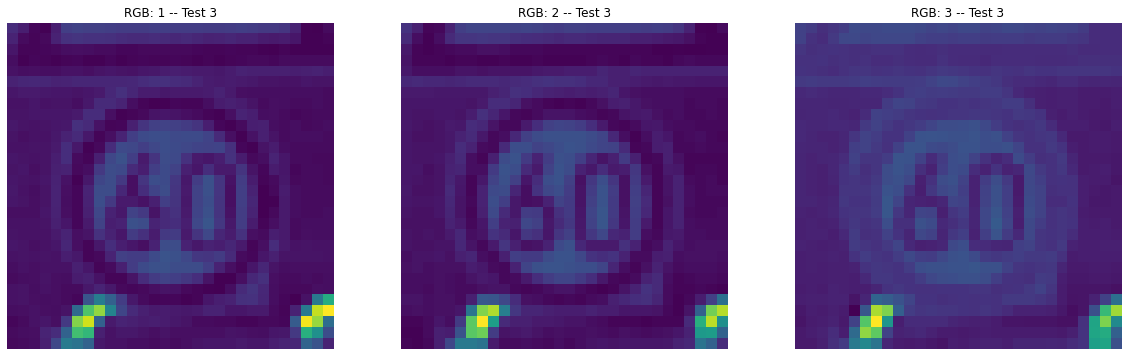

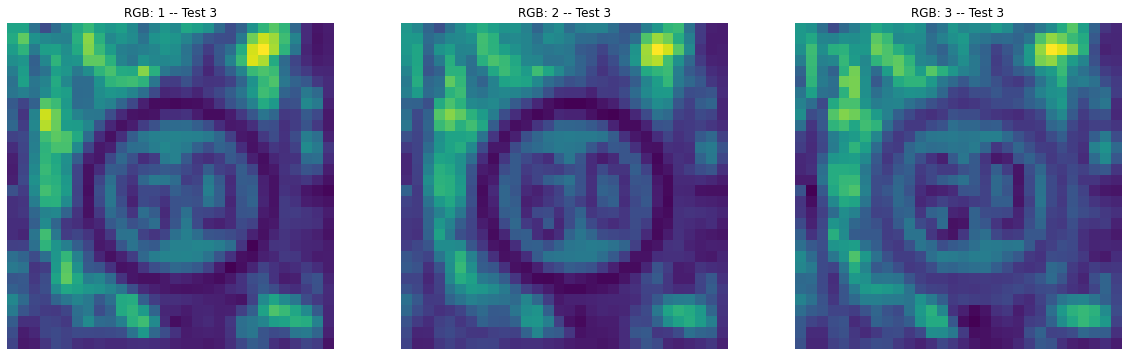

In [6]:
# Safety Monitoring through Statistical Parametric Mapping
!pip install spm1d
import os
from matplotlib import pyplot
import spm1d

# Separating Wrong Responses of the CNN Classifier
X_test_wrong, y_test_wrong = X_test[np.where(y_test != y_pred)], y_test[np.where(y_test != y_pred)]

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 2 (just an example)
X_test_wrong3, y_test_wrong3 = X_test_wrong[np.where(y_test_wrong == 3)], y_test_wrong[np.where(y_test_wrong == 3)]

# print(X_test_wrong1.shape)

X_train3 = X_train[np.where(y_train[:,3] == 1)]


fig2, ax6 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax in enumerate(ax6.flatten()):
    # Comparing X_train for Label == 2 with X_Test_wronge for Label == 2
    xxx, yyy= X_train3[:,:,:,ii], X_test_wrong3[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    snpm    = spm1d.stats.nonparam.ttest2(xxx_2[:30], yyy_2[:30])
    snpmi   = snpm.inference(0.05, two_tailed=True, iterations=1000) # Alpha is considered as 0.05
    
   # print(xxx_2.shape)
    J,Q     = xxx_2.shape
    z       = snpmi.z
    zstar   = snpmi.zstar
    z0      = np.zeros(Q)
    z0      = z
    Z0      = np.reshape(z0, (30,30))
    Z0i     = Z0.copy()
    Z0i[np.abs(Z0i)<zstar] = 0
    ZZ      = np.hstack( [Z0, Z0i] )
    
    print(1 - z[z != 0].mean())
    
    c_ax.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax.axis('off')

fig3, ax7 = pyplot.subplots(1,3, figsize = (20,6))    

for ii, c_ax in enumerate(ax7.flatten()):
    c_ax.imshow(X_train3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, 3))
    c_ax.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong3[1]))
    c_ax.axis('off')

## Safety Monitoring through Statistical Parametric Mapping


900
900
900


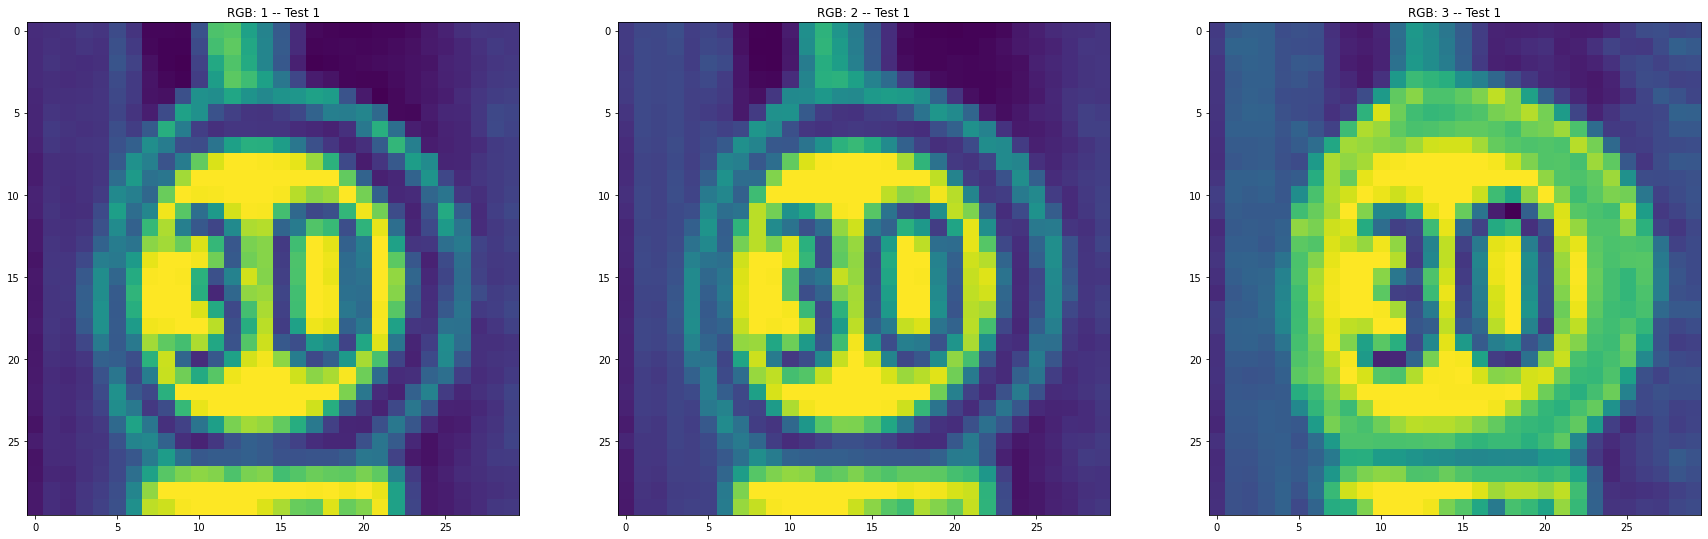

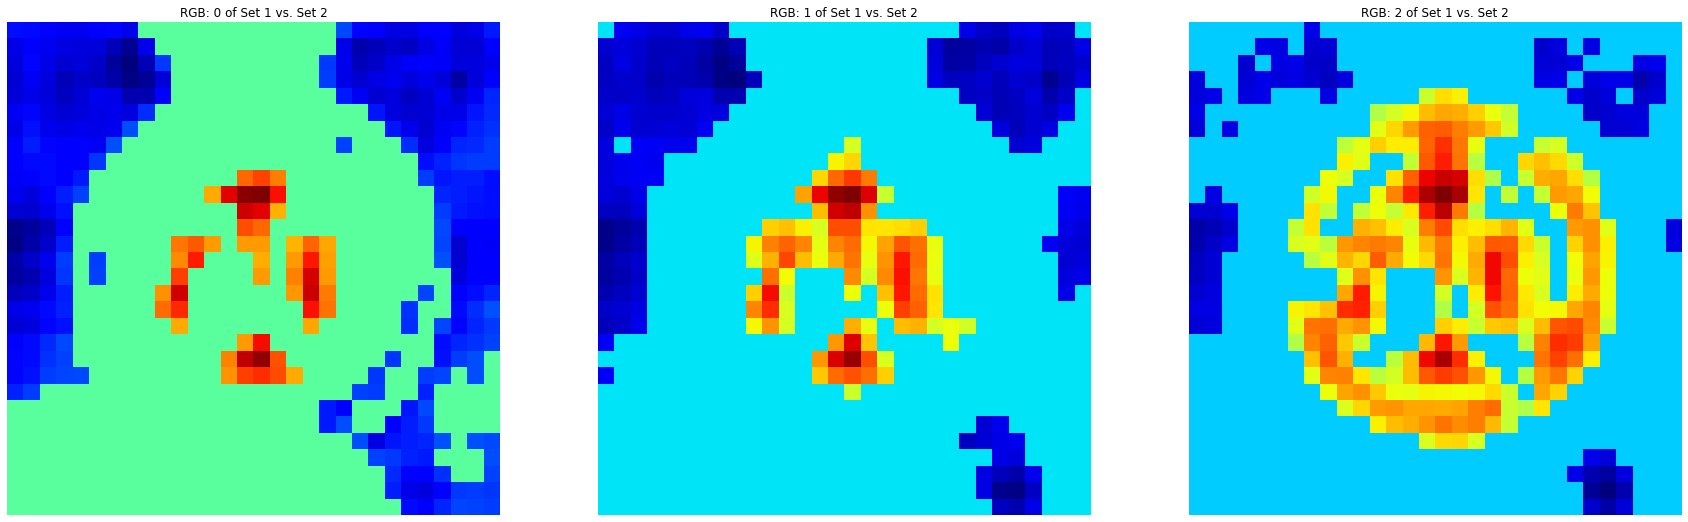

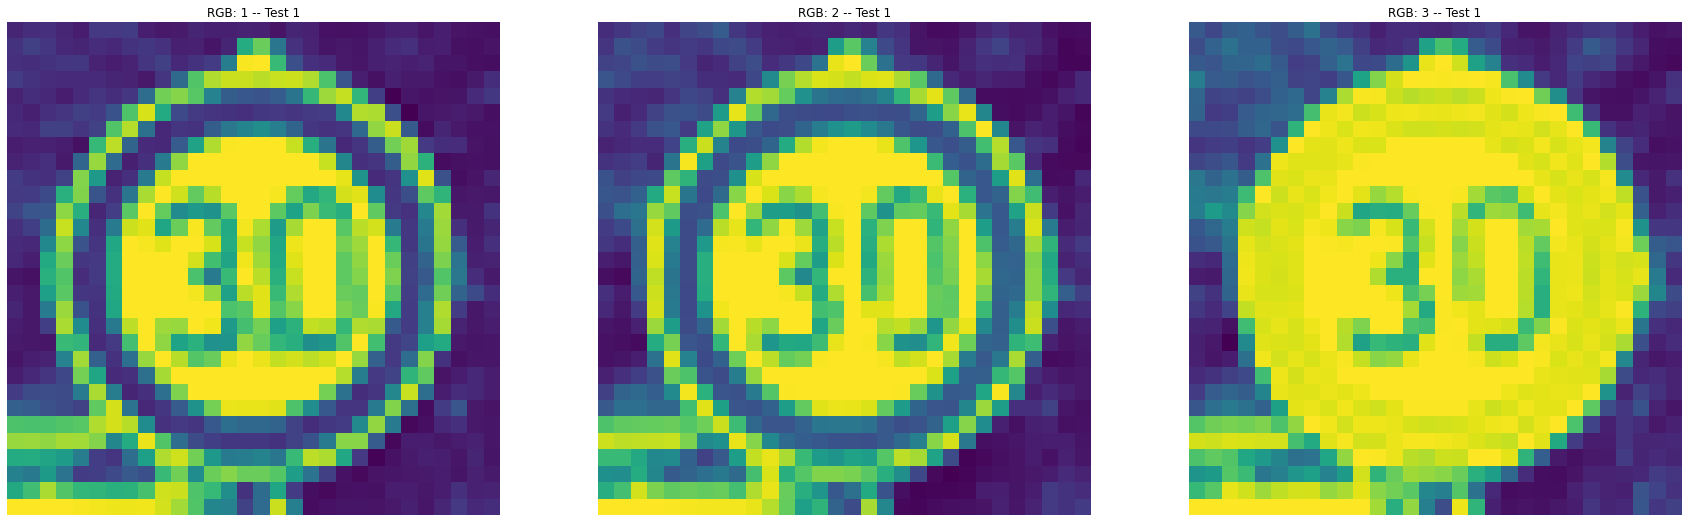

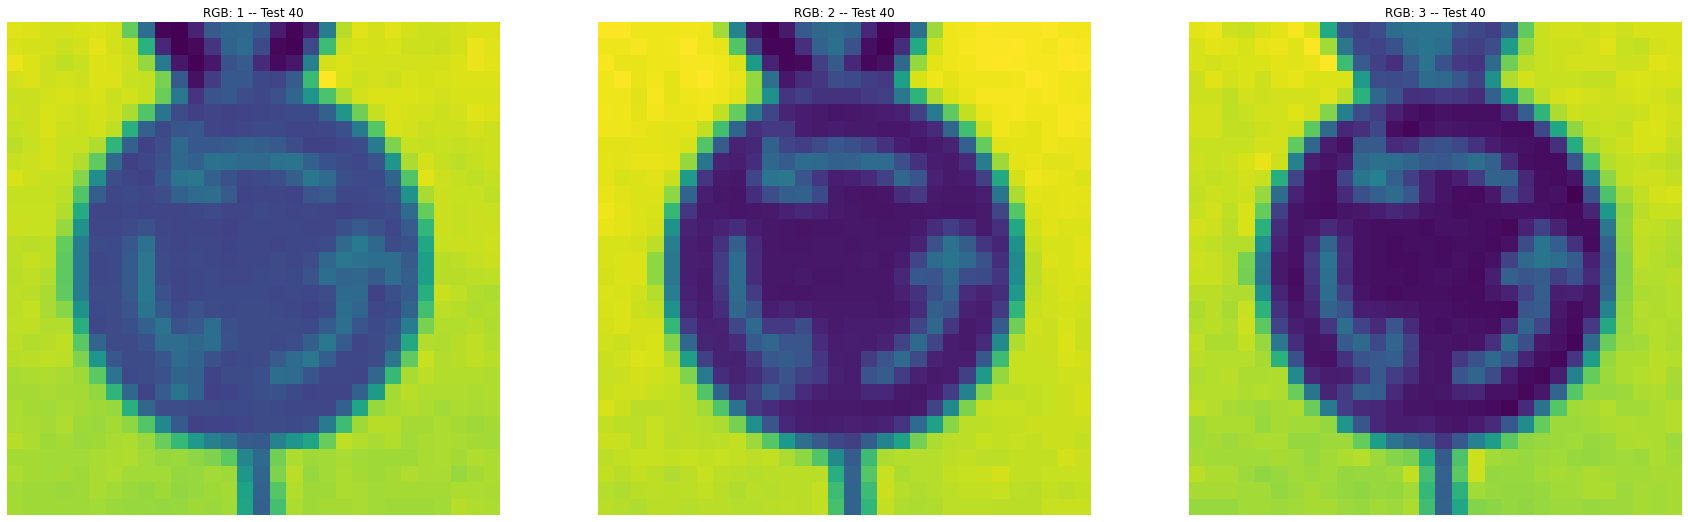

In [7]:
import os
from matplotlib import pyplot
import spm1d

fig, ax1 = plt.subplots(1,3, figsize = (30,12))

for ii, c_ax in enumerate(ax1.flatten()):
    c_ax.imshow(X_test[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test[1]))
    
X_train1, y_train1 = X_train[np.where(y_train[2,:] == 1)], y_train[np.where(y_train[2,:] == 1)]
X_test1, y_test1 = X_test[np.where(y_test == 1)], y_test[np.where(y_test == 1)]
X_test1_pred, y_test1_pred = X_test[np.where(y_pred == 40)], y_test[np.where(y_pred == 40)]

# print(X_test1.shape)

fig2, ax2 = pyplot.subplots(1,3, figsize = (30,10))

for ii, c_ax in enumerate(ax2.flatten()):
    xxx, yyy= X_test1[:,:,:,ii], X_test1_pred[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    snpm    = spm1d.stats.nonparam.ttest2(xxx_2[:30], yyy_2[:30])
    snpmi   = snpm.inference(0.01, two_tailed=True, iterations=1000)
    
    print(xxx_2.shape[1])
    J,Q     = xxx_2.shape
    z       = snpmi.z
    zstar   = snpmi.zstar
    z0      = np.zeros(Q)
    z0      = z
    Z0      = np.reshape(z0, (30,30))
    Z0i     = Z0.copy()
    Z0i[np.abs(Z0i)<zstar] = 0
    ZZ      = np.hstack( [Z0, Z0i] )
    
    c_ax.imshow(Z0i, 'jet')
    c_ax.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax.axis('off')

fig3, ax3 = pyplot.subplots(1,3, figsize = (30,10))    

for ii, c_ax in enumerate(ax3.flatten()):
    c_ax.imshow(X_test1[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test1[1]))
    c_ax.axis('off')
    
fig4, ax4 = pyplot.subplots(1,3, figsize = (30,10))     

for ii, c_ax in enumerate(ax4.flatten()):
    c_ax.imshow(X_test1_pred[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test1_pred[1]))
    c_ax.axis('off')

## Wasserstein Distance Measure

0.9319591121495328
0.9351596244131456
0.9367304038004751


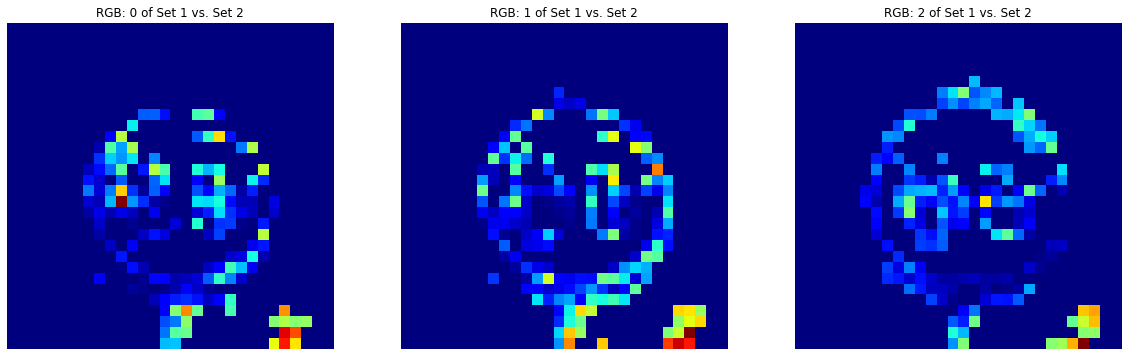

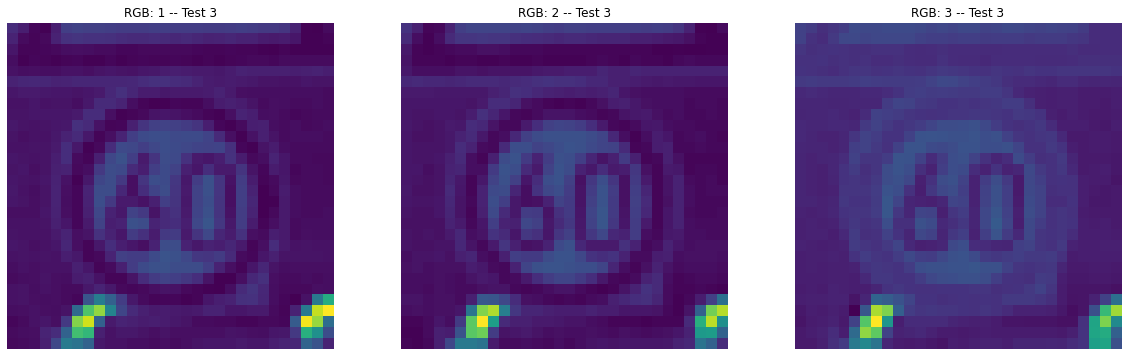

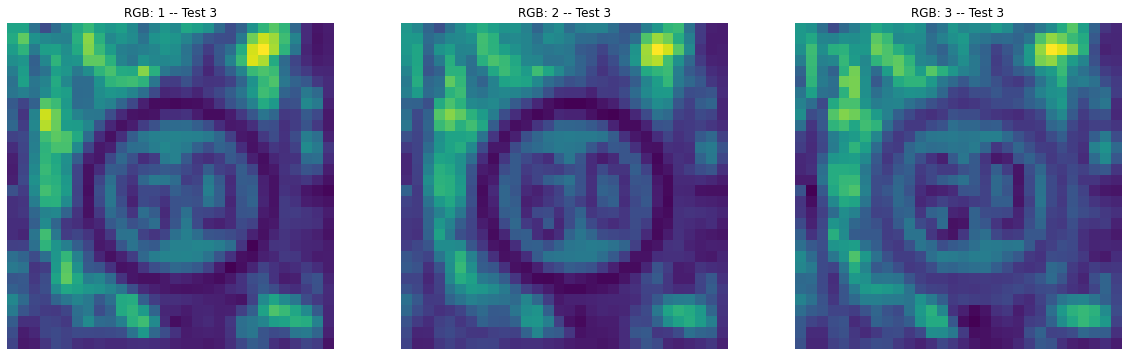

In [8]:
def Wasserstein_Dist(XX, YY):
  
    import numpy as np
    nx = len(XX)
    ny = len(YY)
    n = nx + ny

    XY = np.concatenate([XX,YY])
    X2 = np.concatenate([np.repeat(1/nx, nx), np.repeat(0, ny)])
    Y2 = np.concatenate([np.repeat(0, nx), np.repeat(1/ny, ny)])

    S_Ind = np.argsort(XY)
    XY_Sorted = XY[S_Ind]
    X2_Sorted = X2[S_Ind]
    Y2_Sorted = Y2[S_Ind]

    Res = 0
    E_CDF = 0
    F_CDF = 0
    power = 1

    for ii in range(0, n-2):
        E_CDF = E_CDF + X2_Sorted[ii]
        F_CDF = F_CDF + Y2_Sorted[ii]
        height = abs(F_CDF-E_CDF)
        width = XY_Sorted[ii+1] - XY_Sorted[ii]
        Res = Res + (height ** power) * width;  
 
    return Res

def  Wasserstein_Dist_PVal(XX, YY):
    # Information about Bootstrap: https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
    import random
    nboots = 1000
    WD = Wasserstein_Dist(XX,YY)
    na = len(XX)
    nb = len(YY)
    n = na + nb
    comb = np.concatenate([XX,YY])
    reps = 0
    bigger = 0
    for ii in range(1, nboots):
        e = random.sample(range(n), na)
        f = random.sample(range(n), nb)
        boost_WD = Wasserstein_Dist(comb[e],comb[f]);
        if (boost_WD > WD):
            bigger = 1 + bigger
            
    pVal = bigger/nboots;

    return pVal, WD

C_num = 3

# Separating Wrong Responses of the CNN Classifier
X_test_wrong, y_test_wrong = X_test[np.where(y_test != y_pred)], y_test[np.where(y_test != y_pred)]

# print(X_test_wrong.shape)

# Finding Wrong Decisions for Label 2 (just an example)
X_test_wrong3, y_test_wrong3 = X_test_wrong[np.where(y_test_wrong == C_num)], y_test_wrong[np.where(y_test_wrong == C_num)]

# print(X_test_wrong1.shape)

X_train3 = X_train[np.where(y_train[:,C_num] == 1)]

fig4, ax44 = pyplot.subplots(1,3, figsize = (20,6))
#fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))

for ii, c_ax44 in enumerate(ax44.flatten()):
    # Comparing X_train for Label == 2 with X_Test_wronge for Label == 2
    xxx, yyy= X_train3[:,:,:,ii], X_test_wrong3[:,:,:,ii]
    xxx_2   = np.array([yy.flatten() for yy in xxx])
    yyy_2   = np.array([yy.flatten() for yy in yyy]) 
    
    WD = np.zeros(900)
    pVal = np.zeros(900)
      
    for kk in range(1, 900):
        WD[kk], pVal[kk] = Wasserstein_Dist_PVal(xxx_2[:30,kk], yyy_2[:30,kk]) 
        
    WD2 = WD    

    print(1 - WD2[WD2 != 0].mean())
    #print(1 - WD2.mean())
    
    WD3 = WD
    WD3[pVal > 0.05] = 0
    
    J,Q     = xxx_2.shape
    z       = WD3
    zstar   = pVal #WD.mean()
    z0      = np.zeros(Q)
    z0      = z
    z1      = z0.copy()
    #z1[np.abs(z1)<zstar] = 0
    Z0      = np.reshape(z1, (30,30))
    #Z0i     = Z0.copy()
    #Z0i[np.abs(Z0i)<zstar] = 0
    #ZZ      = np.hstack( [Z0, Z0i] )
    
    z2      = WD
    Z02      = np.reshape(z2, (30,30))
    
    c_ax44.imshow(Z0, 'jet') # Can be replaced with Z0i
    c_ax44.set_title('RGB: {} of Set {} vs. Set {}'.format(ii, 1,2))
    c_ax44.axis('off')
    
fig5, ax55 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax55 in enumerate(ax55.flatten()):
    c_ax55.imshow(X_train3[1,:,:,ii], interpolation = 'none')
    c_ax55.set_title('RGB: {} -- Test {}'.format(ii+1, 3))
    c_ax55.axis("off")
    
fig4, ax8 = pyplot.subplots(1,3, figsize = (20,6))     

for ii, c_ax in enumerate(ax8.flatten()):
    c_ax.imshow(X_test_wrong3[1,:,:,ii], interpolation = 'none')
    c_ax.set_title('RGB: {} -- Test {}'.format(ii+1, y_test_wrong3[1]))
    c_ax.axis('off')    

## Calculating Wilson Interval Confidence


In [9]:
# Kläs, M., & Sembach, L. (2019). Uncertainty wrappers for data-driven models. In International Conference on Computer Safety, Reliability, and Security. Springer.
from math import sqrt
def wilson(p, n, z = 3.29): # The z-score for a 95% confidence interval is 1.96.
    denominator = 1 + z**2/n
    centre_adjusted_probability = p + z*z / (2*n)
    adjusted_standard_deviation = sqrt((p*(1 - p) + z*z / (4*n)) / n)
    
    lower_bound = (centre_adjusted_probability - z*adjusted_standard_deviation) / denominator
    upper_bound = (centre_adjusted_probability + z*adjusted_standard_deviation) / denominator
    
    return (lower_bound, upper_bound)


X_test_correct, y_test_correct = X_test[np.where(y_test == y_pred)], y_test[np.where(y_test == y_pred)]

X_test_correct3, y_test_correct3 = X_test_correct[np.where(y_test_correct == 3)], y_test_correct[np.where(y_test_correct == 3)]

print(X_test_correct3.shape[0])
print(X_test_wrong3.shape[0])

print(1 - X_test_wrong3.shape[0]/X_test_correct3.shape[0])

Negative = X_test_wrong3.shape[0] 
total = X_test_wrong3.shape[0] + X_test_correct3.shape[0] 
p  = 1 - Negative / total

print(wilson(p, total))

430
20
0.9534883720930233
(0.9115079899617693, 0.9782024223191855)
